# Exploratory Data Analysis on Nigerian Graduates in the Labour Market

Employment in Nigeria happens to be a big issue and most graduates, after fulfilling the basic requirements for an entry level job, still find it hard to secure one. And for those are able to, they either end up in an entirely new field (away from what they actually studied in school or desire) or in low-paying jobs. In reality, there is a high rate of unemployment in the country and some graduates tend to wander for a number of years before they are employed.

While this project attempts to shed some light on the life of an average Nigerian graduate in the labour market, it is noteworthy to mention that it is relatively limited in scope due to the smallness of the data size compared to the population of graduates the country churns out every year . So the project will be more useful in the exploratory sense of data analysis than in gathering inference-worthy insights. However, the results obtained show considerable anecdotal evidence.

**Data Source**: The data was obtained through a Google Form survey. The respondents are graduates who completed their degree within 2013–2017, recruited via email and social media, and a few offline. Find the full information on the data source [here](https://www.kaggle.com/stutern/nigerian-gradaute-report-2018).


## Questions to Consider

The data contains a lot of categorical features, many of which are redundant for the purpose of this analysis. So deciding a handful but not exhaustive number of possible insights that could be drawn from the data will help make this project more direct and concise. So, apart from the the necessary data preprocessing, the following questions will be answered through visualizations:

* *Which job sectors offer most graduates entry-level job?*
* *Which job sector do most graduates prefer?*
* *At what rate do graduates switch from/to job sectors?*
* *Is there any correlation between graduates’ first income and current income?* 
* *How is current income distributed by highest educational attainment?*
* *Does working longer hour imply higher income?*
* *Who earns more on average between employed and self-employed graduates?*
* *Do graduates generally earn more with time and is there any variation by gender?*
* *At what rate is qualification required to secure a job?*
* *Through what medium do employed graduates mostly get their jobs?*

This is by no means an exhaustive list of the number of possible analysis that could be carried out from this data. The questions are only posed to help better define the path of the analysis.

## Importing Libraries

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style = 'darkgrid')
sns.set(palette = 'muted')

## Basic Structure of Data

In [4]:
#Read in dataset and return the first three observations
df = pd.read_csv('nggradsurvey.csv')
df.head(3)

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."


In [5]:
df.shape

(5219, 36)

In [6]:
#Return column names
df.columns.values

array(['Timestamp', 'What is your gender', 'Year of graduation',
       'Title of course studied', 'Polytechnic/University attended',
       'What is your highest level of education?',
       'What best describes your current status?',
       'How many jobs have you had since graduation including your current one?',
       'Have you completed your NYSC?',
       'If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?',
       'Did you get your first full time job through your NYSC placement?',
       'Thinking about your first employment after graduation, what was your job level?',
       'What is/was your job role?',
       'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
       'Still thinking about your first employment, what is/was your monthly income level?',
       'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?

**Observation:** 
* The column label for most the variables is very lengthy

In [7]:
#Return summary of columns without per column information to avoid the lengthiness
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Columns: 36 entries, Timestamp to Which of these skills/knowledge did your higher education prepare you for?
dtypes: float64(2), int64(2), object(32)
memory usage: 1.4+ MB


**Observation:**
* Data contains 2-float, 2-integer, and 32-object values 

### Separating the data types into numerical and categorical for better view

In [8]:
df_int = df.select_dtypes(include = 'int64').copy()
df_flt = df.select_dtypes(include = 'float64').copy()
df_nur = pd.merge(df_int, df_flt, how='outer', left_index=True, right_index=True)
df_nur.head()

,Year of graduation,How many jobs have you had since graduation including your current one?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",Approximately how many hours a day do you currently work?
0,2013,3,NaN,8.0
1,2014,2,2017.0,8.0
2,2013,2,NaN,14.0
3,2017,0,NaN,NaN
4,2013,3,2016.0,8.0


In [9]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head(3)

,Timestamp,What is your gender,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,Have you completed your NYSC?,Did you get your first full time job through your NYSC placement?,"Thinking about your first employment after graduation, what was your job level?",What is/was your job role?,...,Which sector is your most preferred sector to work in?,What currency are you currently paid in?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,2/8/2018 9:05:23,Male,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),NaN,NaN,Experience,NaN,...,Engineering,Naira,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),Yes,No,Entry level,NaN,...,Media,Naira,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),Yes,No,Entry level,Option 1,...,Consulting,Naira,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."


## Summary Statistics

### Summary Statistics for Numerical Variables

In [10]:
df.describe()

,Year of graduation,How many jobs have you had since graduation including your current one?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",Approximately how many hours a day do you currently work?
count,5219.000000,5219.000000,4278.000000,3432.000000
mean,2015.329182,1.136999,2016.579009,8.983683
std,1.305153,1.140146,1.354837,2.636293
min,2013.000000,0.000000,2013.000000,0.000000
25%,2014.000000,0.000000,2016.000000,8.000000
50%,2015.000000,1.000000,2017.000000,9.000000
75%,2016.000000,2.000000,2017.000000,10.000000
max,2017.000000,10.000000,2019.000000,24.000000


**Observations:**
1. By default this returns the statistics for only the numerical variables
2.  2013 is the earliest graduation year, 2017 the most recent, and 2015 the mean. (The Median is a better estimate for date) 
3. On average each graduate has only had approximately one job since graduation
4. The mean for jobs had is greater than the median and there is a large difference between the 75th %tile value and the max
5. Point 4. suggests there are extreme outlier(s) in the column
6. Most graduates curently works an average of approximately 9 hours per day
7. The column also shows the presence of at least one outlier in the max of 24 hours (which is not ideal).

### Summary Statistics for Categorical Variables

In [11]:
df_cat.describe()

,Timestamp,What is your gender,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,Have you completed your NYSC?,Did you get your first full time job through your NYSC placement?,"Thinking about your first employment after graduation, what was your job level?",What is/was your job role?,...,Which sector is your most preferred sector to work in?,What currency are you currently paid in?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
count,5219,5219,5219,5219,5219,5219,5218,5218,1656,1654,...,3297,3432,3432,3432,3432,3432,3432,3432,3432,3432
unique,5205,3,127,158,6,10,3,3,6,44,...,30,2,389,7,4,10,3,5,5,69
top,3/25/2018 18:20:33,Male,Computer Science,University of Lagos,Bachelor's degree,Working full time (paid employment),Yes,No,Entry level,Teacher,...,Oil & Gas / Mining,Naira,The level of study,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,"Critical thinking skills, Ability to solve com..."
freq,2,2624,459,527,4402,1371,3418,3561,1141,210,...,452,3377,806,1448,2889,2046,2695,1574,1687,576


**Observations:**
1. This returns the statistics for the categorical variables
2. A cursory look shows there are more male respondents, and computer science and University of lagos are the most popular course and school respectively, just to mention a few observations

### More Summary Statistics for the Categorical Variables

In [12]:
def cat_stat(df):
    """ Function to find the value counts of each categorical variable with and
    without NaN and also compute the number and percentage of missing values.
    
    Args:
        df (Dataframe) - Pandas Dataframe of categorical variables
        
    Returns:
        df_cat_stats - Pandas dataframe containing variables, their values, value count with and
        without NaN, number of missing values, percentage of missing values 
    """
    df_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                           'num_miss', 'pct_miss'])
    stat = pd.DataFrame()

    for c in df.columns:
        stat['column'] = [c]
        stat['values'] = [df[c].unique()]
        stat['values_count_incna'] = len(list(df[c].unique()))
        stat['values_count_nona'] = int(df[c].nunique())
        stat['num_miss'] = df[c].isnull().sum()
        stat['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
        df_cat_stats = df_cat_stats.append(stat)
    return df_cat_stats

In [13]:
cat_stat(df_cat)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Timestamp,"[2/8/2018 9:05:23, 2/15/2018 12:11:32, 2/15/20...",5205,5205,0,0.0
0,What is your gender,"[Male, Female, Prefer not to say]",3,3,0,0.0
0,Title of course studied,"[Electrical & Electronic Engineering, Psycholo...",127,127,0,0.0
0,Polytechnic/University attended,"[Obafemi Awolowo University,Ile-Ife, Bells Uni...",158,158,0,0.0
0,What is your highest level of education?,"[Bachelor's degree, Master's degree, Higher Na...",6,6,0,0.0
0,What best describes your current status?,"[Working full time (paid employment), Self-emp...",10,10,0,0.0
0,Have you completed your NYSC?,"[nan, Yes, No, Ongoing]",4,3,1,0.0
0,Did you get your first full time job through y...,"[nan, No, Yes, I have not completed my NYSC]",4,3,1,0.0
0,Thinking about your first employment after gra...,"[Experience, Entry level, nan, Managerial, Cle...",7,6,3563,68.3
0,What is/was your job role?,"[nan, Option 1, Operations Manager, Creatives,...",45,44,3565,68.3


**Observations:**
1. This displays more intricate information like the number of categories in each variable
2. Six of the variables have at least more than half of their values missing, i.e 68.3 percent missing values  

## Data Cleaning

### Renaming the Columns

In [14]:
#Defining new names for the columns
new_name = ['Timestamp', 'Gender', 'Graduation_year', 'Course', 'College', 'Highest_edu_level', 'Cur_emp_status',
            'Jobs_since_grad', 'NYSC_completion', 'NYSC_completion_year', 'First_emp_via_NYSC', 'First_job_level',
            'First_job_role', 'First_job_sector', 'First_monthly_income', 'First_job_qual_req', 'First_job_acceptance_reason',
            'Cur_job_level', 'Cur_job_role', 'Cur_job_sector', 'Cur_monthly_income', 'Cur_job_qual_req',
            'Cur_job_acceptance_reason', 'Best_perceived_employer', 'BPE_reason', 'Preferred_sector', 'Cur_income_currency',
            'Cur_work_hours', 'Best_qual_aspect_to_employer', 'Job_channel', 'Past_work_exp_with_cur_employer',
            'Most Used Transport System', 'Car/Apartment Acquisition From First Job', 'Course_prep_for_job_role',
            'Course_prep_for_further_studies', 'Skills_gained_from_college']
df.columns = new_name

### Condensing the Dataset to Include only Graduates who have Completed NYSC

* This is done because most Nigerian graduate go for NYSC before entering the labour market

In [15]:
df = df[df['NYSC_completion' ] == 'Yes']
df = df.dropna(subset = ['NYSC_completion_year'])

In [16]:
#Checking the value count of the levels in the variable
df['NYSC_completion_year'].value_counts()

2017.0    1481
2016.0     768
2015.0     515
2014.0     285
2018.0     126
2013.0      73
2019.0       3
Name: NYSC_completion_year, dtype: int64

* The variable contains 2019 as NYSC completion year for three respondents, which means such respondents are still serving

In [17]:
df = df[df['NYSC_completion_year'] != 2019.0]

In [18]:
#Checking if there's any respondent who is still serving in current employment status
df['Cur_emp_status'].unique()

array(['Working full time (paid employment)',
       'Voluntary or other unpaid work or on an internship',
       'Due to start a job in the next month/developing a professional portfolio/creative practice',
       'Unemployed', 'Self-employed/freelance/entrepreneur',
       'Engaged in full-time further study, training or research',
       'Taking time out to prepare for further studies, GMAT, professional exams',
       'Doing something else (e.g. looking after home or family)',
       'Engaged in part-time further study, training or research',
       'Youth Corper (NYSC)'], dtype=object)

* Among the unique values is *Youth Corper (NYSC)*, for those still serving

In [19]:
df = df[df['Cur_emp_status'] != 'Youth Corper (NYSC)']

In [20]:
#Checking respondents through whether or not they got their first employment via NYSC
df['First_emp_via_NYSC'].unique()

array(['No', 'Yes', 'I have not completed my NYSC'], dtype=object)

In [21]:
df = df[df['First_emp_via_NYSC'] != 'I have not completed my NYSC']

### Removing Redundant Variables

* Some of the variables are not needed for the purpose of the analysis and so will be dropped

In [22]:
#Removing unwanted variables
df = df.drop(['College', 'Course', 'Timestamp', 'NYSC_completion', 'First_job_role', 'First_job_acceptance_reason',
              'Cur_job_role', 'Cur_job_acceptance_reason', 'Cur_income_currency', 'Most Used Transport System', 'BPE_reason',
              'Car/Apartment Acquisition From First Job', 'Best_perceived_employer', 'Best_qual_aspect_to_employer',
              'Course_prep_for_further_studies', 'Course_prep_for_job_role', 'Skills_gained_from_college'], axis = 1)

### Replacing Lengthier Values with Shorter ones and Binning where Necessary

In [23]:
df['Highest_edu_level'] = df['Highest_edu_level'].replace(
    {'Bachelor\'s degree':'BSc',
     'Higher National Diploma (HND)':'HND',
     'Master\'s degree':'MSc',
     'MBA degree':'MBA',
     'PhDs/Doctorate Degree':'PhD'}
)

In [24]:
df['Cur_emp_status'] = df['Cur_emp_status'].replace(
    {'Working full time (paid employment)':'Employed', 'Unemployed':'Unemployed',
    'Self-employed/freelance/entrepreneur':'Self-employed',
    'Voluntary or other unpaid work or on an internship':'Volunteering/internship',
    'Engaged in full-time further study, training or research':'Further study',
    'Due to start a job in the next month/developing a professional portfolio/creative practice':'Skill development',
    'Taking time out to prepare for further studies, GMAT, professional exams':'Further study',
    'Doing something else (e.g. looking after home or family)':'Doing something else',
    'Engaged in part-time further study, training or research':'Further study'}
)

In [25]:
#Printing the values for first- and current-job levels to know if they tally
df['First_job_level'].unique()
df['Cur_job_level'].unique()

array(['Entry level', 'Managerial', nan, 'Clerical and administrative',
       'Experience/Professional', 'Executive Director'], dtype=object)

array(['Experience', 'Entry level', 'Managerial', nan,
       'Experience/Professional', 'Clerical and administrative',
       'Executive Director'], dtype=object)

In [26]:
for i in df[['First_job_level', 'Cur_job_level']]:
    df[i] = df[i].replace(
        {'Entry level':'Entry',
         'Clerical and administrative':'Administrative',
         'Experience/Professional':'Experience',
         'Executive Director':'Director'
        })

In [27]:
#Print the symmetric difference to know if there's any value unique to any of the variables
print(set(df['First_job_sector']).symmetric_difference(set(df['Cur_job_sector'])))
print(set(df['Preferred_sector']).symmetric_difference(set(df['Cur_job_sector'])))

set()
set()


* The empty sets signify that the three variables have excatly the same elements. Only replacement will be done

In [28]:
for j in df[['First_job_sector', 'Cur_job_sector', 'Preferred_sector']]:
    df[j] = df[j].replace({
        'Banking / Financial Services':'Banking/Finance', 'Insurance':'Banking/Finance',
        'Agriculture/Poultry/Fishing':'Agriculture', 'Logistics / Transportation':'Transportation/Logistics',
        'Government / Defence':'Government/Defence', 'Media':'Media/Creatives', 'Creatives/Art/Design':'Media/Creatives',
        'Advertising / Marketing / Comms':'Marketing/Communication', 'Manufacturing / Production':'Manufacturing',
        'Construction / Real Estate':'Construction/Real Estate', 'Hospitality/Leisure':'Tourism/Hospitality',
        'Travels/Tours':'Tourism/Hospitality', 'Oil & Gas / Mining':'Oil&Gas', 'Power/Energy':'Engineering',
        'Aerospace':'Engineering', 'Food Services':'FMCG', 'Trade / Services':'Trade/Services',
        'Retail / Wholesales':'Trade/Services', 'Ecommerce/Internet':'Trade/Services', 'Blue Collar':'Others'})

In [29]:
print(set(df['First_job_qual_req']).symmetric_difference(set(df['Cur_job_qual_req'])))

set()


In [30]:
for k in df[['First_job_qual_req', 'Cur_job_qual_req']]:
    df[k] = df[k].replace({'Yes: the qualification was a formal requirement':'Yes', 'No: the qualification was not required':'No',
     'Yes: while the qualification was not a formal requirement it did give me an advantage':'Notreq_but_useful',
     'Don\'t know':'Don\'t know'})

In [31]:
df['Job_channel'].value_counts()

Personal contacts, including family and friends                     972
Recruitment agency/Online job site                                  445
Social media/professional networking sites                          417
Media (e.g. newspaper/magazine advertisement)                       181
Internship                                                          145
University/polytechnic (e.g. Careers Service, lecturer, website)     67
Employer's website                                                   67
Name: Job_channel, dtype: int64

In [32]:
df['Job_channel'] = df['Job_channel'].replace(
    {'Personal contacts, including family and friends':'Personal Contact',
     'Media (e.g. newspaper/magazine advertisement)':'Print Media',
     'University/polytechnic (e.g. Careers Service, lecturer, website)':'College Career Service',
     'Social media/professional networking sites':'Social Media',
     'Recruitment agency/Online job site':'Recruitment agency/Job Site',
     'Employer\'s website':'Employer\'s Website'}
)

In [33]:
df['Past_work_exp_with_cur_employer'].value_counts()

No                                                  2016
Yes: during my higher education study                144
Yes: before and during my higher education study      69
Yes: before my higher education                       65
Name: Past_work_exp_with_cur_employer, dtype: int64

In [34]:
df['Past_work_exp_with_cur_employer'] = df['Past_work_exp_with_cur_employer'].replace(
    {'Yes: during my higher education study':'Yes',
     'Yes: before and during my higher education study':'Yes',
     'Yes: before my higher education':'Yes'}
)

### Adjusting NYSC Completion Year

* Ideally graduation year should be less than or equal to NYSC completion year

In [35]:
#checking if graduation year is less than or equal to graduation year
df['diff'] = df[['NYSC_completion_year']].sub(df['Graduation_year'], axis = 0)
df['diff'].unique()

array([ 3.,  2.,  1., -3.,  0., -4.,  4., -2., -1.,  5.])

In [36]:
#Assigning the ideal values to NYSC completion year where necessary
df.loc[df['diff'] < 0, 'NYSC_completion_year'] = df['Graduation_year'] + 1

In [37]:
df['diff'] = df[['NYSC_completion_year']].sub(df['Graduation_year'], axis = 0)
df['diff'].unique()

array([3., 2., 1., 0., 4., 5.])

In [38]:
df = df.drop('diff', axis = 1)

In [39]:
df['NYSC_completion_year'] = df['NYSC_completion_year'].astype(int)

In [40]:
df.head()

,Gender,Graduation_year,Highest_edu_level,Cur_emp_status,Jobs_since_grad,NYSC_completion_year,First_emp_via_NYSC,First_job_level,First_job_sector,First_monthly_income,First_job_qual_req,Cur_job_level,Cur_job_sector,Cur_monthly_income,Cur_job_qual_req,Preferred_sector,Cur_work_hours,Job_channel,Past_work_exp_with_cur_employer
1,Male,2014,BSc,Employed,2,2017,No,Entry,Media/Creatives,"‎₦20,000 - ‎₦49,999",Yes,Experience,Media/Creatives,"‎₦100,000 - ‎₦149,999",Yes,Media/Creatives,8.0,Internship,No
4,Female,2013,BSc,Employed,3,2016,No,Managerial,Trade/Services,"‎₦50,000 - ‎₦99,999",Notreq_but_useful,Entry,Marketing/Communication,"‎₦100,000 - ‎₦149,999",Yes,Marketing/Communication,8.0,Personal Contact,No
6,Male,2013,HND,Employed,4,2016,No,Entry,Technology,"‎₦20,000 - ‎₦49,999",Yes,Managerial,Technology,"‎₦250,000 and more",No,Media/Creatives,8.0,College Career Service,Yes
7,Male,2015,BSc,Employed,1,2017,No,NaN,NaN,NaN,NaN,Entry,Consulting,"‎₦50,000 - ‎₦99,999",Yes,Banking/Finance,11.0,Internship,No
9,Female,2015,BSc,Volunteering/internship,0,2016,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#Checking the state of the categorical data again
df_cat1 = df.select_dtypes(include = 'object').copy()
cat_stat(df_cat1).reset_index().drop('index', axis = 1)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Gender,"[Male, Female]",2,2,0,0.0
1,Highest_edu_level,"[BSc, HND, MSc, MBA, PhD]",5,5,0,0.0
2,Cur_emp_status,"[Employed, Volunteering/internship, Skill deve...",7,7,0,0.0
3,First_emp_via_NYSC,"[No, Yes]",2,2,0,0.0
4,First_job_level,"[Entry, Managerial, nan, Administrative, Exper...",6,5,2055,63.7
5,First_job_sector,"[Media/Creatives, Trade/Services, Technology, ...",22,21,2055,63.7
6,First_monthly_income,"[‎₦20,000 - ‎₦49,999, ‎₦50,000 - ‎₦99,999, nan...",8,7,2055,63.7
7,First_job_qual_req,"[Yes, Notreq_but_useful, nan, No, Don't know]",5,4,2055,63.7
8,Cur_job_level,"[Experience, Entry, Managerial, nan, Administr...",6,5,934,28.9
9,Cur_job_sector,"[Media/Creatives, Marketing/Communication, Tec...",22,21,934,28.9


## Treating Missing Values

### Missing Values for Categorical Variables

In [42]:
#Showing respondents with just one job since graduation
df[df['Jobs_since_grad'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 7 to 5216
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1121 non-null   object 
 1   Graduation_year                  1121 non-null   int64  
 2   Highest_edu_level                1121 non-null   object 
 3   Cur_emp_status                   1121 non-null   object 
 4   Jobs_since_grad                  1121 non-null   int64  
 5   NYSC_completion_year             1121 non-null   int32  
 6   First_emp_via_NYSC               1121 non-null   object 
 7   First_job_level                  0 non-null      object 
 8   First_job_sector                 0 non-null      object 
 9   First_monthly_income             0 non-null      object 
 10  First_job_qual_req               0 non-null      object 
 11  Cur_job_level                    1121 non-null   object 
 12  Cur_job_sector      

**Observation:**
* The above shows that respondents with just one job since graduation all have missing data for all first job related column, which means they all counted their one job under current job, a structural missing value type.

In [43]:
#Showing respondents with zero job since graduation
#pd.set_option('display.max_columns', None) #To display all columns
df[df['Jobs_since_grad'] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 9 to 5218
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           934 non-null    object 
 1   Graduation_year                  934 non-null    int64  
 2   Highest_edu_level                934 non-null    object 
 3   Cur_emp_status                   934 non-null    object 
 4   Jobs_since_grad                  934 non-null    int64  
 5   NYSC_completion_year             934 non-null    int32  
 6   First_emp_via_NYSC               934 non-null    object 
 7   First_job_level                  0 non-null      object 
 8   First_job_sector                 0 non-null      object 
 9   First_monthly_income             0 non-null      object 
 10  First_job_qual_req               0 non-null      object 
 11  Cur_job_level                    0 non-null      object 
 12  Cur_job_sector       

**Observation:**
* The above shows that respondents with just zero job since graduation all have missing data for all first and current job related columns, which is a structural kind of missing value.

In [44]:
#To reorder Cur_work_hours, which is a float, for easy application of missing value treatment
cur_cols = df.columns.tolist()
cur_cols = cur_cols[0:16] + cur_cols[17:19] + cur_cols[16:17]
cur_cols

['Gender',
 'Graduation_year',
 'Highest_edu_level',
 'Cur_emp_status',
 'Jobs_since_grad',
 'NYSC_completion_year',
 'First_emp_via_NYSC',
 'First_job_level',
 'First_job_sector',
 'First_monthly_income',
 'First_job_qual_req',
 'Cur_job_level',
 'Cur_job_sector',
 'Cur_monthly_income',
 'Cur_job_qual_req',
 'Preferred_sector',
 'Job_channel',
 'Past_work_exp_with_cur_employer',
 'Cur_work_hours']

In [45]:
df = df[cur_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 1 to 5218
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           3228 non-null   object 
 1   Graduation_year                  3228 non-null   int64  
 2   Highest_edu_level                3228 non-null   object 
 3   Cur_emp_status                   3228 non-null   object 
 4   Jobs_since_grad                  3228 non-null   int64  
 5   NYSC_completion_year             3228 non-null   int32  
 6   First_emp_via_NYSC               3228 non-null   object 
 7   First_job_level                  1173 non-null   object 
 8   First_job_sector                 1173 non-null   object 
 9   First_monthly_income             1173 non-null   object 
 10  First_job_qual_req               1173 non-null   object 
 11  Cur_job_level                    2294 non-null   object 
 12  Cur_job_sector      

In [46]:
#Filling the structural missing values for all affected columns
fill_miss = df.iloc[:,7:18]
fill_miss.fillna('no job', inplace = True)
df.iloc[:,7:18] = fill_miss

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 1 to 5218
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           3228 non-null   object 
 1   Graduation_year                  3228 non-null   int64  
 2   Highest_edu_level                3228 non-null   object 
 3   Cur_emp_status                   3228 non-null   object 
 4   Jobs_since_grad                  3228 non-null   int64  
 5   NYSC_completion_year             3228 non-null   int32  
 6   First_emp_via_NYSC               3228 non-null   object 
 7   First_job_level                  3228 non-null   object 
 8   First_job_sector                 3228 non-null   object 
 9   First_monthly_income             3228 non-null   object 
 10  First_job_qual_req               3228 non-null   object 
 11  Cur_job_level                    3228 non-null   object 
 12  Cur_job_sector      

### Missing Values for Numerical Variables

* From above it is only Cur_work_hours that contain missing values among the numerical variables. It is also noteworthy that since there are current work hour values for unemployed respondents among others, the operational meaning of Cur_work_hours also implies current busy hour

In [48]:
df['Cur_work_hours'].value_counts()

8.0     690
9.0     558
10.0    403
12.0    163
7.0     113
11.0     89
6.0      70
5.0      46
13.0     19
14.0     18
24.0     17
4.0      17
0.0      17
15.0     11
18.0     10
20.0      9
2.0       8
3.0       8
16.0      7
8.5       6
9.5       6
10.5      3
17.0      2
19.0      2
1.0       1
23.0      1
Name: Cur_work_hours, dtype: int64

In [49]:
#binning all current work hour greater than 15 into 15 i.e outlier treatment
df.loc[df['Cur_work_hours'] > 15.0, 'Cur_work_hours'] = 15.0
df['Cur_work_hours'].value_counts()

8.0     690
9.0     558
10.0    403
12.0    163
7.0     113
11.0     89
6.0      70
15.0     59
5.0      46
13.0     19
14.0     18
0.0      17
4.0      17
2.0       8
3.0       8
8.5       6
9.5       6
10.5      3
1.0       1
Name: Cur_work_hours, dtype: int64

* Ideally employed and self-employed respondents are not expected to have zero or nan current work hours, so it is worth checking

In [50]:
df[df['Cur_work_hours'] == 0.0]['Cur_emp_status'].value_counts()

Unemployed                 13
Further study               2
Employed                    1
Volunteering/internship     1
Name: Cur_emp_status, dtype: int64

In [51]:
#Checking the rows with nan work hours to see any pattern
df[df['Cur_work_hours'].isnull()]['Cur_emp_status'].value_counts()

Unemployed                 511
Self-employed              200
Further study               95
Volunteering/internship     48
Doing something else        45
Skill development           29
Employed                     6
Name: Cur_emp_status, dtype: int64

In [52]:
#replacing zero and missing Cur_work_hours values for Employed with its level-wise median
df.loc[((df['Cur_emp_status'] == 'Employed') & ((df['Cur_work_hours'] == 0) |
    (df['Cur_work_hours'].isnull()))), 'Cur_work_hours'] = df[df['Cur_emp_status'] == 'Employed']['Cur_work_hours'].median()

In [53]:
#replacing missing Cur_work_hours values for other cur_emp_status values with their respective level-wise median
work_hour_med = df.groupby(['Cur_emp_status'])['Cur_work_hours'].transform('median')
df['Cur_work_hours'].fillna(work_hour_med, inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3228 entries, 1 to 5218
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           3228 non-null   object 
 1   Graduation_year                  3228 non-null   int64  
 2   Highest_edu_level                3228 non-null   object 
 3   Cur_emp_status                   3228 non-null   object 
 4   Jobs_since_grad                  3228 non-null   int64  
 5   NYSC_completion_year             3228 non-null   int32  
 6   First_emp_via_NYSC               3228 non-null   object 
 7   First_job_level                  3228 non-null   object 
 8   First_job_sector                 3228 non-null   object 
 9   First_monthly_income             3228 non-null   object 
 10  First_job_qual_req               3228 non-null   object 
 11  Cur_job_level                    3228 non-null   object 
 12  Cur_job_sector      

## Feature Engineering

* To make the income buckets more usable, numerical features will be engineered out of it. Precisely mean income is generated from the income buckets. Plus, to make later scatterplot visualizations more appealing, random incomes are also generated from the income bucket

### Creating integer income-level columns

In [55]:
def incy(df):
    """ Function to strip off all string charaters in the income buckets
    and also assign the left and right value boundaries to variable names.
    
    Args:
        df (Dataframe) - Pandas Dataframe containing the income buckets.
        
    Returns:
        df (Dataframe) - Pandas Dataframe stripped of string characters and
        separated by left and right value boundaries
    """
    
    i = 'Inc1'
    k = 1
    for g in list(df.columns):
        df[i] = df[g].apply(lambda x: x.split(
                '-')[0].strip().replace('\u200e₦', '').replace(',', '') if '-' in x
                else x.split(' ')[0].strip().replace('Under', '0') if 'Under' in x
                else x.split('and')[0].strip().replace('\u200e₦', '').replace(',', ''))
        i = i + '.' + str(k)
        df[i] = df[g].apply(lambda x: x.split(
                '-')[1].strip().replace('\u200e₦', '').replace(',', '') if '-' in x
                else x.split(' ')[1].strip().replace('\u200e₦', '').replace(',', '') if 'Under' in x
                else x.split('and')[0].strip().replace('\u200e₦250,000', '300000'))
        i = i[:3] + str(int(i[3]) + k)
    return df

In [56]:
engf = df.loc[:, ['First_monthly_income', 'Cur_monthly_income']]
engf = incy(engf)
engf = engf.drop(['First_monthly_income', 'Cur_monthly_income'], axis = 1)
engf = engf.replace('no job', 0)

for i in list(engf.columns):
    engf[i] = engf[i].astype(int)
df[['Inc1', 'Inc1.1', 'Inc2', 'Inc2.1']] = engf

df['First_mean_income'] = df[['Inc1', 'Inc1.1']].mean(axis = 1)
df['Cur_mean_income'] = df[['Inc2', 'Inc2.1']].mean(axis = 1)
df = df.replace({'Inc1.1': 0, 'Inc2.1': 0}, 1)
df['First_rand_income'] = df.apply(lambda x: pd.Series(np.random.randint(x['Inc1'], x['Inc1.1'])), axis = 1)
df['Cur_rand_income'] = df.apply(lambda x: pd.Series(np.random.randint(x['Inc2'], x['Inc2.1'])), axis = 1)


In [57]:
df = df.drop(['Inc1', 'Inc1.1', 'Inc2', 'Inc2.1'], axis = 1)

In [58]:
df.head()

,Gender,Graduation_year,Highest_edu_level,Cur_emp_status,Jobs_since_grad,NYSC_completion_year,First_emp_via_NYSC,First_job_level,First_job_sector,First_monthly_income,...,Cur_monthly_income,Cur_job_qual_req,Preferred_sector,Job_channel,Past_work_exp_with_cur_employer,Cur_work_hours,First_mean_income,Cur_mean_income,First_rand_income,Cur_rand_income
1,Male,2014,BSc,Employed,2,2017,No,Entry,Media/Creatives,"‎₦20,000 - ‎₦49,999",...,"‎₦100,000 - ‎₦149,999",Yes,Media/Creatives,Internship,No,8.0,34999.5,124999.5,30520,144912
4,Female,2013,BSc,Employed,3,2016,No,Managerial,Trade/Services,"‎₦50,000 - ‎₦99,999",...,"‎₦100,000 - ‎₦149,999",Yes,Marketing/Communication,Personal Contact,No,8.0,74999.5,124999.5,98096,148517
6,Male,2013,HND,Employed,4,2016,No,Entry,Technology,"‎₦20,000 - ‎₦49,999",...,"‎₦250,000 and more",No,Media/Creatives,College Career Service,Yes,8.0,34999.5,275000.0,39910,281523
7,Male,2015,BSc,Employed,1,2017,No,no job,no job,no job,...,"‎₦50,000 - ‎₦99,999",Yes,Banking/Finance,Internship,No,11.0,0.0,74999.5,0,96098
9,Female,2015,BSc,Volunteering/internship,0,2016,No,no job,no job,no job,...,no job,no job,no job,no job,no job,8.0,0.0,0.0,0,0


## General Univariate Analysis

* To have a quick overview of the distribution of the variables, general univariate visualizations are plotted. This, though not answering our questions, serves as a vantage from which to have deeper understanding of each variabes. It is plotted separely for categorical and numerical variables 

### Categorical Variables

In [59]:
df_cat3 = df.select_dtypes(include = 'object').copy()
cat_stat(df_cat3)

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,Gender,"[Male, Female]",2,2,0,0.0
0,Highest_edu_level,"[BSc, HND, MSc, MBA, PhD]",5,5,0,0.0
0,Cur_emp_status,"[Employed, Volunteering/internship, Skill deve...",7,7,0,0.0
0,First_emp_via_NYSC,"[No, Yes]",2,2,0,0.0
0,First_job_level,"[Entry, Managerial, no job, Administrative, Ex...",6,6,0,0.0
0,First_job_sector,"[Media/Creatives, Trade/Services, Technology, ...",22,22,0,0.0
0,First_monthly_income,"[‎₦20,000 - ‎₦49,999, ‎₦50,000 - ‎₦99,999, no ...",8,8,0,0.0
0,First_job_qual_req,"[Yes, Notreq_but_useful, no job, No, Don't know]",5,5,0,0.0
0,Cur_job_level,"[Experience, Entry, Managerial, no job, Admini...",6,6,0,0.0
0,Cur_job_sector,"[Media/Creatives, Marketing/Communication, Tec...",22,22,0,0.0


In [60]:
#Grouping the variabels based on number of levels
litlev = pd.DataFrame()
midlev = pd.DataFrame()
highlev = pd.DataFrame()
for s in list(df_cat3):
    if len(df_cat3[s].unique()) <= 6:
        litlev[s] = df_cat3[s]
    elif len(df_cat3[s].unique()) == 7 or len(df_cat3[s].unique()) == 8:
        midlev[s] = df_cat3[s]
    else:
        highlev[s] = df_cat3[s]

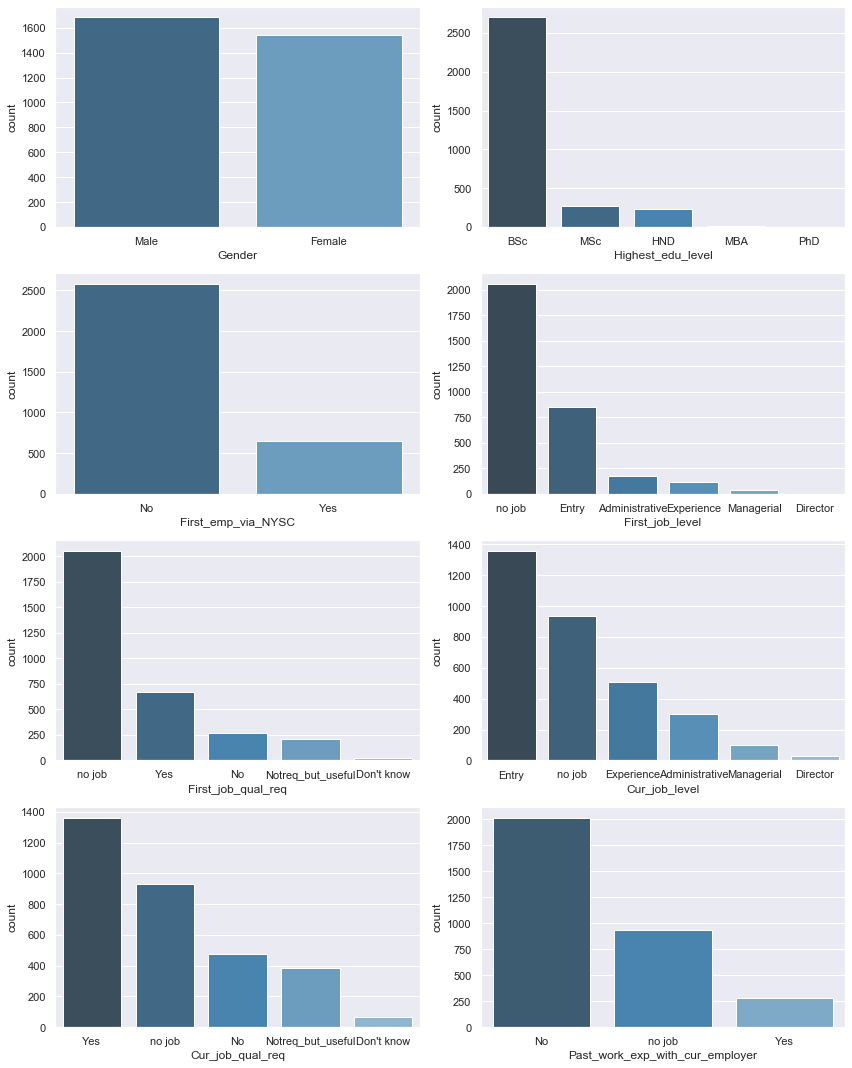

In [61]:
k = 1
fig = plt.figure(figsize = (12,15))
for m in list(litlev):
    ax1 = fig.add_subplot(4,2,k)
    _ = sns.countplot(data = litlev, x=m, ax = ax1, order = litlev[m].value_counts().index, palette = "Blues_d")
    k = k+1
    plt.tight_layout()

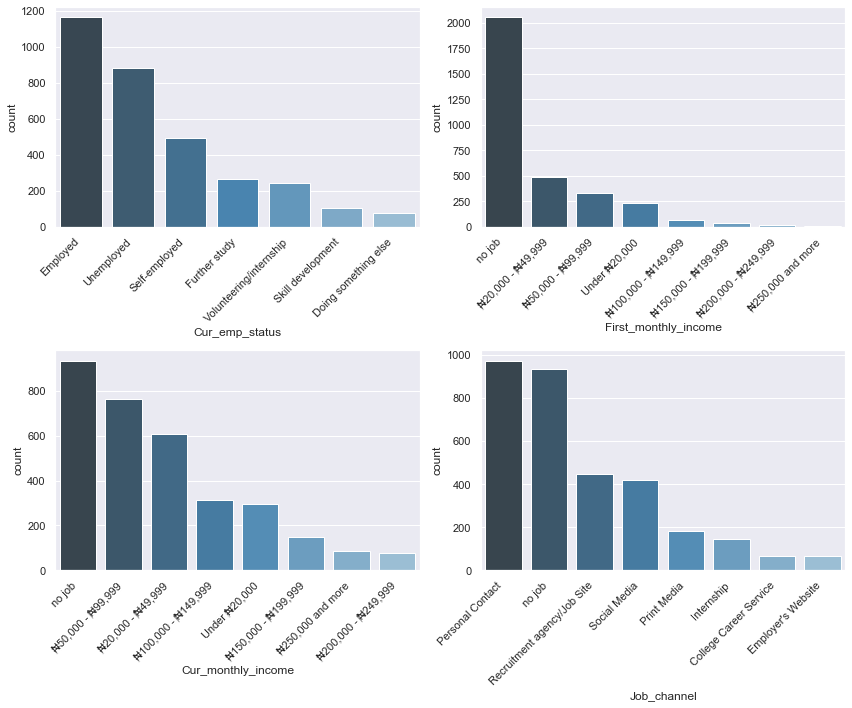

In [62]:
k = 1
fig = plt.figure(figsize = (12,10))
for m in list(midlev):
    ax1 = fig.add_subplot(2,2,k)
    _ = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    _ = sns.countplot(data = midlev, x=m, ax = ax1, order = midlev[m].value_counts().index, palette = "Blues_d")
    plt.tight_layout()
    k = k+1

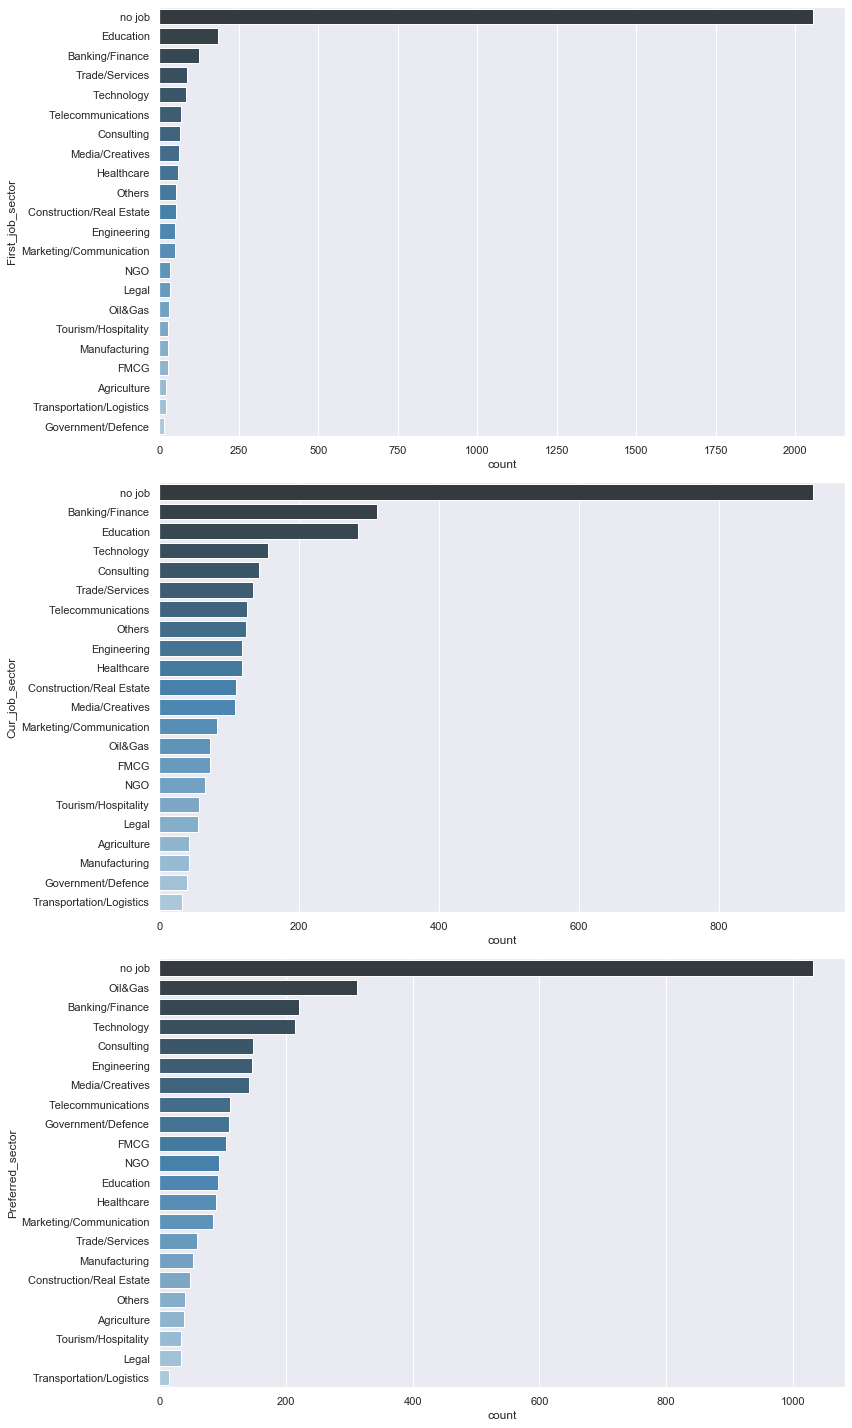

In [63]:
k = 1
fig = plt.figure(figsize = (12,20))
for m in list(highlev):
    ax1 = fig.add_subplot(3,1,k)
    #plt.xticks(rotation = 45)
    _ = sns.countplot(data = highlev, y=m, ax = ax1, order = highlev[m].value_counts().index, palette = "Blues_d")
    plt.tight_layout()
    k = k+1

### Numerical Variables

* This is the histogram for _Jobs since graduation_ , _Current work/busy hours_ and _first mean income_ and _current mean income_. Also the randomized value for the incomes were plotted to see the refined spread.

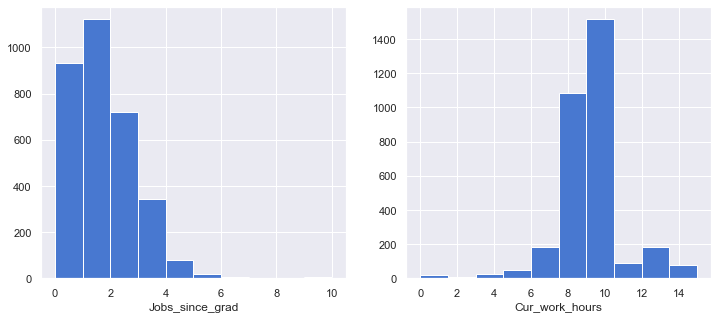

In [64]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1,2,1)
sns.distplot(df['Jobs_since_grad'], bins = 10, kde=False, hist = True, hist_kws={"alpha": 1})

ax1 = fig.add_subplot(1,2,2)
sns.distplot(df['Cur_work_hours'], bins = 10, kde=False, hist = True, hist_kws={"alpha": 1});

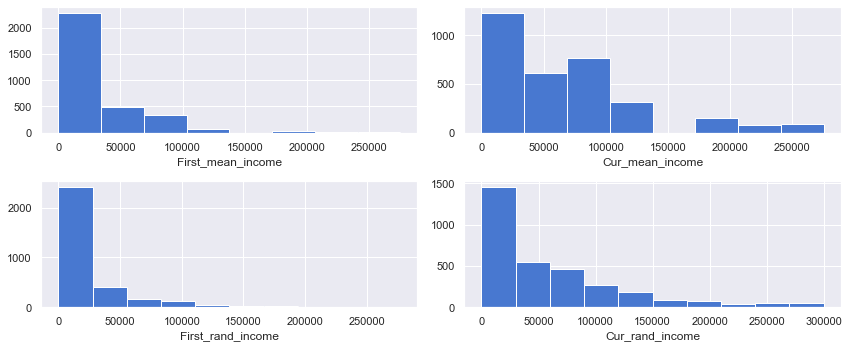

In [65]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(2,2,1)
sns.distplot(df['First_mean_income'], bins = 8, kde=False, hist = True, hist_kws={"alpha": 1})

ax1 = fig.add_subplot(2,2,2)
sns.distplot(df['Cur_mean_income'], bins = 8, kde=False, hist = True, hist_kws={"alpha": 1})

ax1 = fig.add_subplot(2,2,3)
sns.distplot(df['First_rand_income'], bins = 10, kde=False, hist = True, hist_kws={"alpha": 1})

ax1 = fig.add_subplot(2,2,4)
sns.distplot(df['Cur_rand_income'], bins = 10, kde=False, hist = True, hist_kws={"alpha": 1})
plt.tight_layout();

## Exploratory Analysis: Answers to Questions

### What are the top five job sectors that offer entry level jobs?

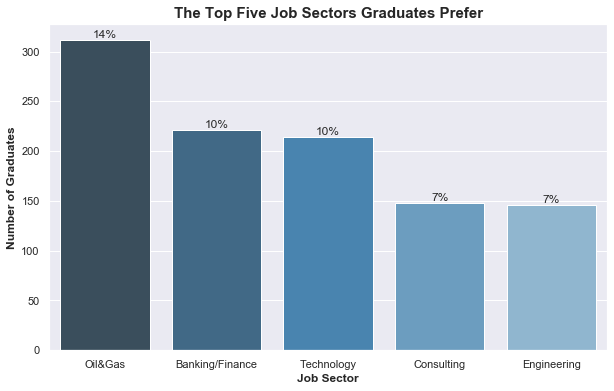

In [66]:
fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'Preferred_sector', data = df[df['Preferred_sector'] != 'no job'],
            order = df['Preferred_sector'].value_counts().iloc[1:6].index, palette = "Blues_d")
_ = plt.title('The Top Five Job Sectors Graduates Prefer', weight='bold', fontsize = 15)
_ = plt.ylabel('Number of Graduates', weight='bold', fontsize =12)
_ = plt.xlabel('Job Sector', weight='bold', fontsize =12)

ncount = len(df[df['Preferred_sector'] != 'no job'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    _ = ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

### What are the job sectors graduates prefer most?

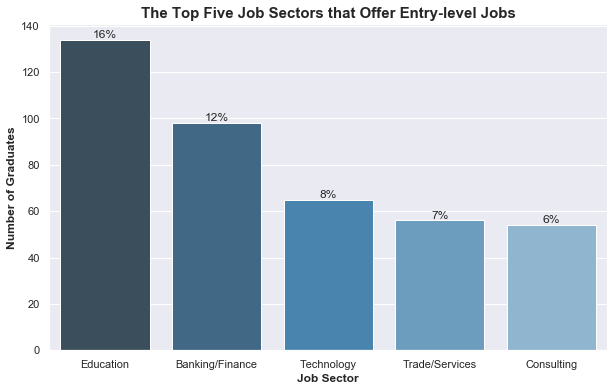

In [67]:
fig = plt.figure(figsize = (10,6))
top_entry = df[(df['First_job_level'] == 'Entry') & (df['First_job_sector'] != 'no job')]
ax = sns.countplot(x = 'First_job_sector', data = top_entry,
            order = top_entry['First_job_sector'].value_counts().iloc[0:5].index, palette = "Blues_d")
_ = plt.title('The Top Five Job Sectors that Offer Entry-level Jobs', weight='bold', fontsize = 15)
_ = plt.ylabel('Number of Graduates', weight='bold', fontsize =12)
_ = plt.xlabel('Job Sector', weight='bold', fontsize =12)

ncount = len(top_entry)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    _ = ax.annotate('{:.0f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

* To easily compare the difference between the job sectors that graduates get and what they actually prefer, each of the job sectors in both figures side by side. Plus in this case all job levels are considered, as not all first jobs are of entry level

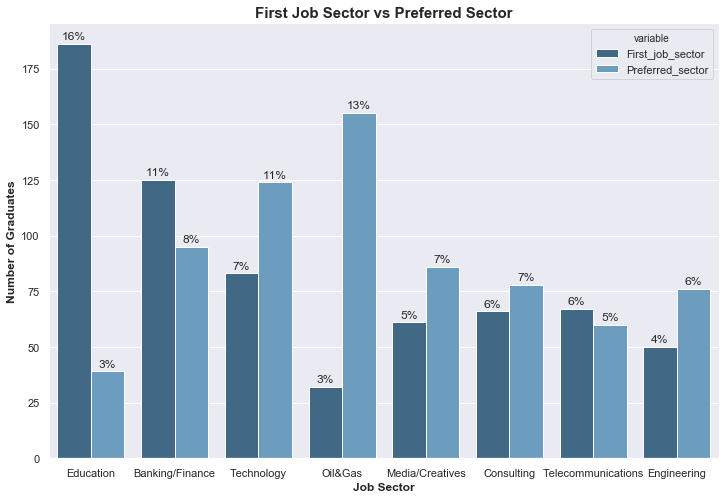

In [68]:
dfs = df[['First_job_sector', 'Preferred_sector']]
dfs = dfs[dfs['First_job_sector'] != 'no job']
dfs = dfs.reset_index().melt(id_vars= ['index'])

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
_ = sns.countplot(x="value", hue="variable", data = dfs, palette = "Blues_d", order = dfs['value'].value_counts().iloc[0:8].index);
_ = plt.title('First Job Sector vs Preferred Sector', weight='bold', fontsize = 15)
_ = plt.xlabel('Job Sector', weight='bold', fontsize = 12)
_ = plt.ylabel('Number of Graduates', weight='bold', fontsize = 12)

total1 = float(len(dfs))
for p in ax.patches:
    height = p.get_height()
    _ = ax.text(p.get_x()+p.get_width()/2., height + 2, '{:1.0f}%'.format((2*height/total1).round(3)*100),
    ha="center", fontsize = 12)

* But one expects that as graduates move to new jobs they will be moving to their preferred job sectors, and thus reduce the difference in the percentages on each pair of bars above. The figure below explains: 

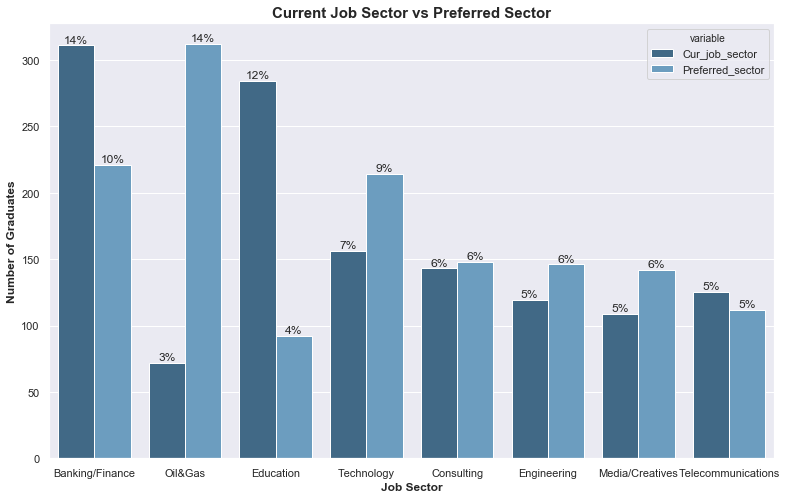

In [69]:
dft = df[['Cur_job_sector', 'Preferred_sector']]
dft = dft[dft['Cur_job_sector'] != 'no job']
dft = dft.reset_index().melt(id_vars= ['index'])

fig = plt.figure(figsize = (13, 8))
ax2 = fig.add_subplot()
_ = sns.countplot(x="value", hue="variable", data = dft, palette = "Blues_d", order = dft['value'].value_counts().iloc[0:8].index);
_ = plt.title('Current Job Sector vs Preferred Sector', weight='bold', fontsize = 15)
_ = plt.xlabel('Job Sector', weight='bold', fontsize = 12)
_ = plt.ylabel('Number of Graduates', weight='bold', fontsize = 12)

total2 = float(len(dft))
for p in ax2.patches:
    height = p.get_height()
    _ = ax2.text(p.get_x()+p.get_width()/2., height + 2, '{:1.0f}%'.format((2*height/total2).round(3)*100),
    ha="center", fontsize = 12)

### At what rate do graduates switch from/to job sectors?

In [70]:
most_switch = df[(df['First_job_sector'] != df['Cur_job_sector']) & (df['First_job_sector'] != 'no job')]
a = pd.DataFrame(most_switch['First_job_sector'].value_counts())
b = pd.DataFrame(most_switch['Cur_job_sector'].value_counts())
print(set(most_switch['First_job_sector']).symmetric_difference(set(most_switch['Cur_job_sector'])))

set()


In [71]:
c = pd.merge(a, b, how='outer', left_index=True, right_index=True)
c['plusminus'] = c[['Cur_job_sector']].sub(c['First_job_sector'], axis=0)
c['perc'] = ((c['plusminus'] * 100)/c['Cur_job_sector']).round()
c['perc'] = c['perc'].astype(int)

In [72]:
c

,First_job_sector,Cur_job_sector,plusminus,perc
Agriculture,11,15,4,27
Banking/Finance,45,75,30,40
Construction/Real Estate,20,22,2,9
Consulting,30,33,3,9
Education,93,39,-54,-138
Engineering,22,29,7,24
FMCG,13,28,15,54
Government/Defence,7,8,1,12
Healthcare,12,12,0,0
Legal,12,6,-6,-100


<Figure size 864x576 with 0 Axes>

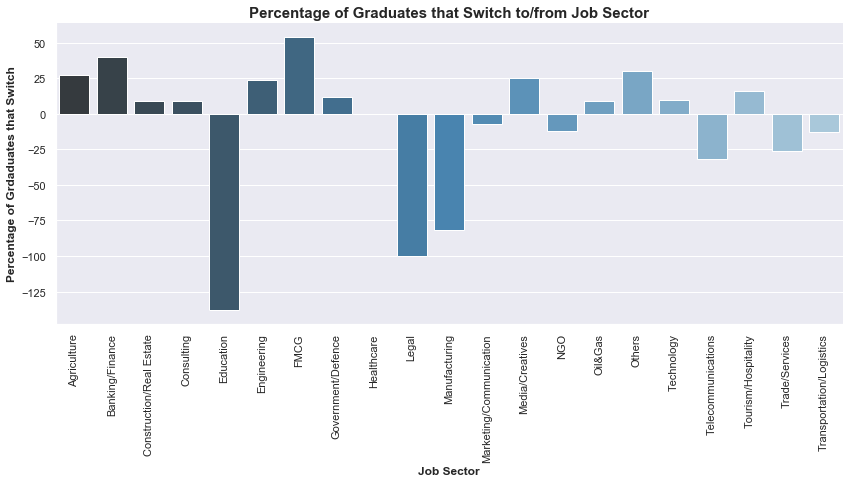

In [73]:
fig = plt.figure(figsize = (12,8))
sns.catplot(data = c.reset_index(), kind = 'bar', x = 'index', y = 'perc', aspect = 2.5,  palette = "Blues_d")
plt.xticks(rotation = 90)
plt.xlabel('Job Sector', weight='bold', fontsize = 12)
plt.ylabel('Percentage of Grdaduates that Switch', weight='bold', fontsize = 12)
plt.title('Percentage of Graduates that Switch to/from Job Sector', weight='bold', fontsize = 15);

* Now switching is for those with more than one job so far. How about those who have only had one job? Comparing this first entrant rate to the switch rate above will give insight on the overall equilibrium of each of the job sectors. This is presented in the chart that follows

In [74]:
most_switch1 = df[(df['First_job_sector'] != df['Cur_job_sector'])]
a1 = pd.DataFrame(most_switch1['First_job_sector'].value_counts())
b1 = pd.DataFrame(most_switch1['Cur_job_sector'].value_counts())
print(set(most_switch1['First_job_sector']).symmetric_difference(set(most_switch1['Cur_job_sector'])))

{'no job'}


In [75]:
c1 = pd.merge(a1, b1, how='outer', left_index=True, right_index=True)
c1 = c1.replace(np.NaN, 0)
c1['Cur_job_sector'] = c1['Cur_job_sector'].astype(int)
c1['plusminus1'] = c1[['Cur_job_sector']].sub(c1['First_job_sector'], axis=0)
c1['perc1'] = ((c1['plusminus1'] * 100)/c1['Cur_job_sector']).round()

In [76]:
c1 = c1.drop('no job')
c1['perc1'] = c1['perc1'].astype(int)
c1

,First_job_sector,Cur_job_sector,plusminus1,perc1
Agriculture,11,33,22,67
Banking/Finance,45,231,186,81
Construction/Real Estate,20,78,58,74
Consulting,30,107,77,72
Education,93,191,98,51
Engineering,22,91,69,76
FMCG,13,59,46,78
Government/Defence,7,32,25,78
Healthcare,12,70,58,83
Legal,12,35,23,66


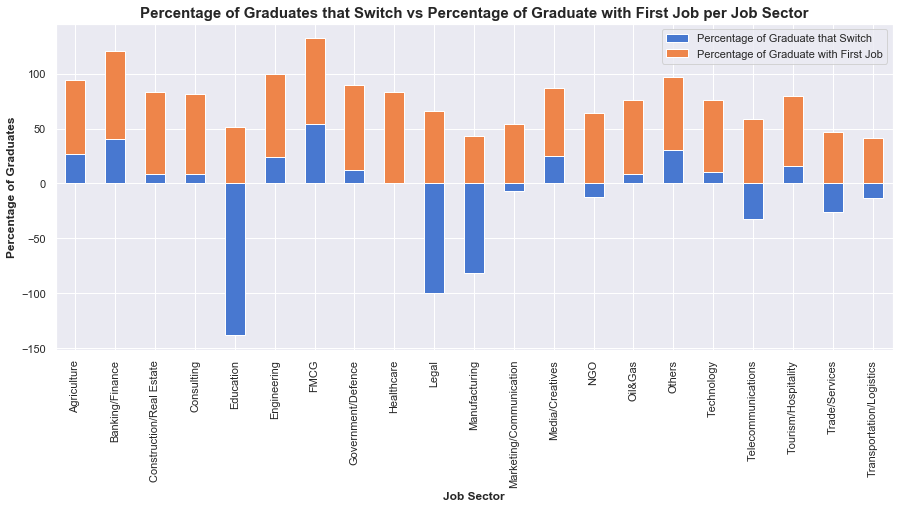

In [77]:
d = pd.merge(c, c1, how='outer', left_index=True, right_index=True)
d1 = d[['perc', 'perc1']]
ren = ['Percentage of Graduate that Switch', 'Percentage of Graduate with First Job']
d1.columns = ren

fig, ax = plt.subplots(figsize=(15, 6))
d1.plot(kind='bar', stacked=True, ax = ax)
plt.title('Percentage of Graduates that Switch vs Percentage of Graduate with First Job per Job Sector',
          weight='bold', fontsize = 15)
plt.ylabel('Percentage of Graduates', weight='bold', fontsize = 12)
plt.xlabel('Job Sector', weight='bold', fontsize = 12);

### Is there any correlation between graduates’ first income and current income?

* To answer this, let’s have a quick overview of the distribution of both incomes

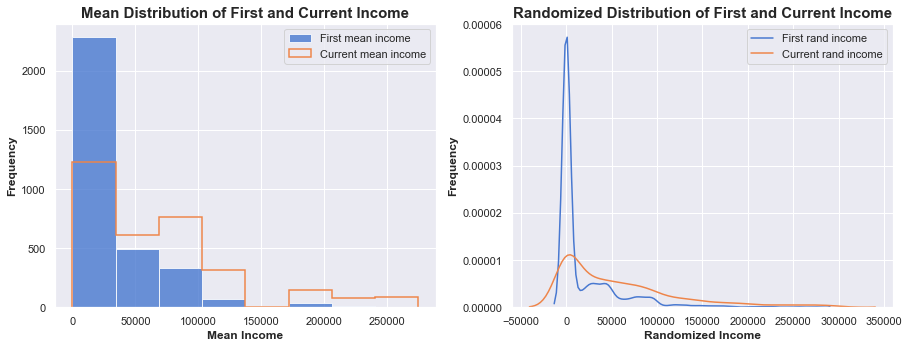

In [78]:
fig = plt.figure(figsize = (13, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(df['First_mean_income'], label = 'First mean income', hist = True, bins = 8, kde=False, hist_kws={"alpha": 0.8}, ax = ax1)
sns.distplot(df['Cur_mean_income'], hist = True, bins = 8, kde=False, hist_kws={"alpha": 1, "histtype": "step",
                 "linewidth": 1.5, "label": "Current mean income"}, ax = ax1)
ax1.legend()
ax1.set_xlabel('Mean Income', weight='bold', fontsize = 12)
ax1.set_ylabel('Frequency', weight='bold', fontsize = 12)
ax1.set_title('Mean Distribution of First and Current Income', weight='bold', fontsize = 15)

sns.distplot(df['First_rand_income'], hist = False, kde_kws={"label": "First rand income"}, ax = ax2)
sns.distplot(df['Cur_rand_income'], hist = False, kde_kws={"label": "Current rand income"}, ax = ax2)
ax2.set_xlabel('Randomized Income', weight='bold', fontsize = 12)
ax2.set_ylabel('Frequency', weight='bold', fontsize = 12)
ax2.set_title('Randomized Distribution of First and Current Income', weight='bold', fontsize = 15)
plt.tight_layout();

* As stated earlier, the essence of the randomized values is to improve visualization and were used only in cases where scatterplots were plotted. Elsewhere the mean values were used. Otherwise they are both clearly stated.

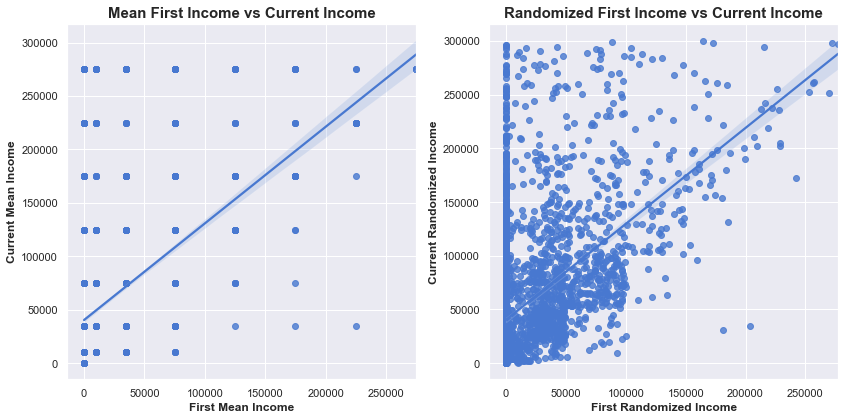

In [79]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(1,2,1)
sns.regplot(data = df, y = 'Cur_mean_income', x = 'First_mean_income')
plt.title('Mean First Income vs Current Income', weight='bold', fontsize = 15)
plt.ylabel('Current Mean Income', weight='bold', fontsize = 12)
plt.xlabel('First Mean Income', weight='bold', fontsize = 12)

ax1 = fig.add_subplot(1,2,2)
sns.regplot(data = df, y = 'Cur_rand_income', x = 'First_rand_income');
plt.title('Randomized First Income vs Current Income', weight='bold', fontsize = 15)
plt.ylabel('Current Randomized Income', weight='bold', fontsize = 12)
plt.xlabel('First Randomized Income', weight='bold', fontsize = 12);
plt.tight_layout();

### How is current income distributed by highest educational attainment?

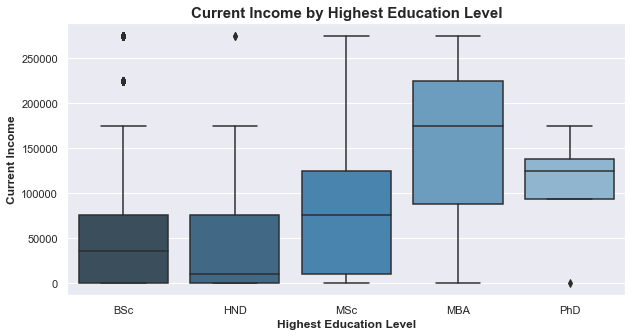

In [80]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(data = df, x='Highest_edu_level', y='Cur_mean_income', palette = "Blues_d")
plt.title('Current Income by Highest Education Level', weight='bold', fontsize = 15)
plt.ylabel('Current Income', weight='bold', fontsize = 12)
plt.xlabel('Highest Education Level', weight='bold', fontsize = 12);

### Does working longer hour imply higher income?

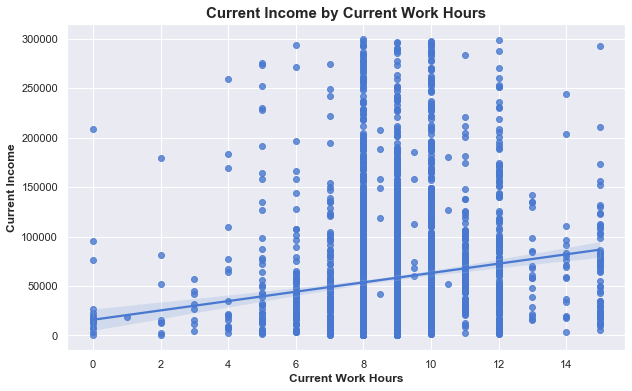

In [81]:
fig = plt.figure(figsize = (10,6))
sns.regplot(x = 'Cur_work_hours', y = 'Cur_rand_income', data = df)
plt.title('Current Income by Current Work Hours', weight='bold', fontsize = 15)
plt.ylabel('Current Income', weight='bold', fontsize = 12)
plt.xlabel('Current Work Hours', weight='bold', fontsize = 12);

### Who earns more between employed and self-employed graduates?

In [82]:
earn_more = df.set_index('Cur_emp_status')
earn_more = earn_more.loc[['Employed', 'Self-employed']]
earn_more = earn_more.reset_index()

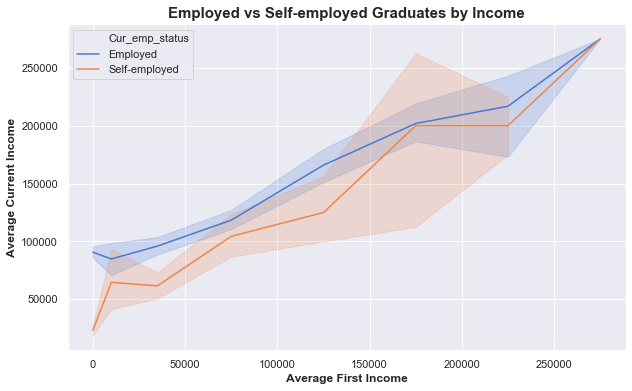

In [83]:
fig = plt.figure(figsize = (10, 6))
sns.lineplot(hue="Cur_emp_status", y="Cur_mean_income", x="First_mean_income", data = earn_more)
plt.title('Employed vs Self-employed Graduates by Income', weight='bold', fontsize = 15)
plt.ylabel('Average Current Income', weight='bold', fontsize = 12)
plt.xlabel('Average First Income', weight='bold', fontsize = 12);

### Do Graduates generally earn more with time and is there any variation by gender?

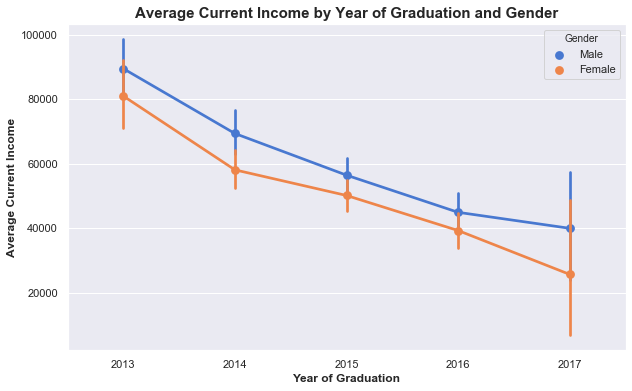

In [84]:
fig = plt.figure(figsize = (10,6))
sns.pointplot(y="Cur_mean_income", x = 'Graduation_year', hue = 'Gender', data = df)
plt.title('Average Current Income by Year of Graduation and Gender', weight='bold', fontsize = 15)
plt.ylabel('Average Current Income', weight='bold', fontsize = 12)
plt.xlabel('Year of Graduation', weight='bold', fontsize = 12);

### At what rate is qualification required to secure a job?

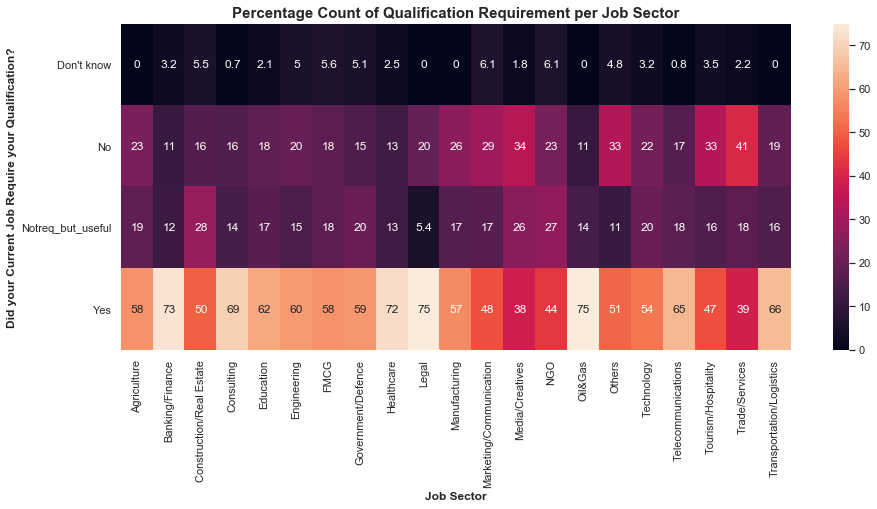

In [85]:
fnl = df[(df['Cur_job_qual_req'] != 'no job') & (df['Cur_job_sector'] != 'no job')]
fig = plt.figure(figsize = (15,6))
sns.heatmap(pd.crosstab(fnl['Cur_job_qual_req'], fnl['Cur_job_sector'], normalize='columns').round(3)*100, annot=True)
plt.title('Percentage Count of Qualification Requirement per Job Sector', weight='bold', fontsize = 15)
plt.ylabel('Did your Current Job Require your Qualification?', weight='bold', fontsize =12)
plt.xlabel('Job Sector', weight='bold', fontsize =12);

### Through what channel do employed graduates get their jobs?

In [86]:
order = ['Personal Contact', 'Recruitment agency/Job Site', 'Social Media', 'Print Media',
                      'Internship', 'College Career Service', 'Employer\'s Website'],

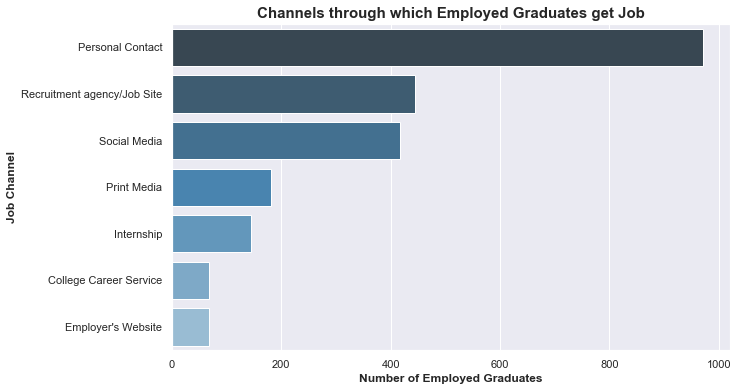

In [87]:
fig = plt.figure(figsize = (10,6))
sns.countplot(y = 'Job_channel', data = df[(df['Cur_emp_status'] != 'no job') & (df['Job_channel'] != 'no job')],
              order = ['Personal Contact', 'Recruitment agency/Job Site', 'Social Media', 'Print Media',
                      'Internship', 'College Career Service', 'Employer\'s Website'], palette = "Blues_d")
plt.title('Channels through which Employed Graduates get Job', weight='bold', fontsize = 15)
plt.xlabel('Number of Employed Graduates', weight='bold', fontsize =12)
plt.ylabel('Job Channel', weight='bold', fontsize =12);



For a detailed description of the findings from the visualizations, kindly check [this article](https://medium.com/@babagee500/exploratory-data-analysis-on-nigerian-graduates-in-the-labour-market-90f4599dd594) published on Medium. Thank you.